In [2]:
#!pip install geopy
#!pip install folium
#!conda install -c conda-forge geocoder --yes


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import geocoder
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


# Data Acquisition and Scraping

In [3]:
#!conda install -c conda-forge wikipedia --yes
import wikipedia as wp
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.head()



,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [4]:
df = df[df.Borough != 'Not assigned']
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

df.head()
#df.shape
df_backup = df

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [5]:
df = df.groupby(['Borough', 'Postcode'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df.head()

,Borough,Postcode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]))

The dataframe has 11 boroughs and 103 neighborhoods.


# Part 2

Get Latitude and Longitude according to the Postcodes using the geocoder package

In [7]:
lat_list = []
lng_list = []
post = []

for i in range(df.shape[0]):
    postcode = df['Postcode'].iloc[i]
    address = postcode+', Toronto, Ontario'
    g = geocoder.arcgis(address)
    post.append(postcode)
    lat_list.append(g.latlng[0])
    lng_list.append(g.latlng[1])

In [8]:
latlng_df = pd.DataFrame(
    {'Postcode': post,
     'Latitude': lat_list,
     'Longitude': lng_list
    })

tor_df = pd.merge(df, latlng_df, on='Postcode')
tor_df = tor_df[['Postcode','Borough','Neighbourhood','Latitude','Longitude']]
tor_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728420,-79.387133
1,M4P,Central Toronto,Davisville North,43.712755,-79.388514
2,M4R,Central Toronto,North Toronto West,43.714523,-79.406960
3,M4S,Central Toronto,Davisville,43.703395,-79.385964
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.690685,-79.382946
5,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686074,-79.402265
6,M5N,Central Toronto,Roselawn,43.711941,-79.419120
7,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.694785,-79.414405
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.674840,-79.403768
9,M4W,Downtown Toronto,Rosedale,43.682205,-79.377945


Get demographics data of Toronto

In [9]:
#overall population distribution 
html = wp.page("Demographics of Toronto").html().encode("UTF-8")

In [10]:
# North York population distribution by ethnicity
North_pop_df = pd.read_html(html, header = 0)[14]
North_pop_df = North_pop_df.rename(columns={'%':'% of Ethnic Origin 1',
                                           '%.1':'% of Ethnic Origin 2',
                                           '%.2':'% of Ethnic Origin 3',
                                           '%.3':'% of Ethnic Origin 4',
                                           '%.4':'% of Ethnic Origin 5',
                                           '%.5':'% of Ethnic Origin 6',
                                           '%.6':'% of Ethnic Origin 7',
                                            '%.7':'% of Ethnic Origin 8'})
North_pop_df

,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [11]:
#Scarborough population distribution by ethnicity
Scarborough_pop_df = pd.read_html(html, header = 0)[15]
Scarborough_pop_df = North_pop_df.rename(columns={'%':'% of Ethnic Origin 1',
                                           '%.1':'% of Ethnic Origin 2',
                                           '%.2':'% of Ethnic Origin 3',
                                           '%.3':'% of Ethnic Origin 4',
                                           '%.4':'% of Ethnic Origin 5',
                                           '%.5':'% of Ethnic Origin 6',
                                           '%.6':'% of Ethnic Origin 7',
                                            '%.7':'% of Ethnic Origin 8'})
Scarborough_pop_df

,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [12]:
#TORONTO & EAST YORK population distribution by ethnicity 
TEY_population_df = pd.read_html(html, header = 0)[13]
TEY_population_df = TEY_population_df.rename(columns={'%':'% of Ethnic Origin 1',
                                                       '%.1':'% of Ethnic Origin 2',
                                                       '%.2':'% of Ethnic Origin 3',
                                                       '%.3':'% of Ethnic Origin 4',
                                                       '%.4':'% of Ethnic Origin 5',
                                                       '%.5':'% of Ethnic Origin 6',
                                                       '%.6':'% of Ethnic Origin 7',
                                                        '%.7':'% of Ethnic Origin 8',
                                                        '%.8':'% of Ethnic Origin 9'})
TEY_population_df



,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8,Ethnic Origin #9,% of Ethnic Origin 9
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#ETOBICOKE & YORK population distribution by ethnicity 
EY_population_df = pd.read_html(html, header = 0)[16]
EY_population_df = EY_population_df.rename(columns={'%':'% of Ethnic Origin 1',
                                           '%.1':'% of Ethnic Origin 2',
                                           '%.2':'% of Ethnic Origin 3',
                                           '%.3':'% of Ethnic Origin 4',
                                           '%.4':'% of Ethnic Origin 5',
                                           '%.5':'% of Ethnic Origin 6',
                                           '%.6':'% of Ethnic Origin 7',
                                            '%.7':'% of Ethnic Origin 8'})
EY_population_df

,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting location data

In [14]:
# get coordinates of Toronto
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [ ]:
# Using Foursquare API to get venues
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [16]:
LIMIT = 100

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [17]:
#Function to get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Japango,Sushi Restaurant,43.655268,-79.385165
2,Karine's,Breakfast Spot,43.653699,-79.390743
3,Manpuku まんぷく,Japanese Restaurant,43.653612,-79.390613
4,Nathan Phillips Square,Plaza,43.652270,-79.383516


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=tor_df['Neighbourhood'],
                                   latitudes=tor_df['Latitude'],
                                   longitudes=tor_df['Longitude']
                                )

Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Queen's Park
The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Business Reply Mail Processing Centre 969 Eastern
Woodbine Gardens, Parkview Hill
Woodbine Heights
Leaside
Thorncl

In [21]:
toronto_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728420,-79.387133,Averax Group,43.727406,-79.383103,Construction & Landscaping
1,Lawrence Park,43.728420,-79.387133,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728420,-79.387133,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712755,-79.388514,Sherwood Park,43.716551,-79.387776,Park
4,Davisville North,43.712755,-79.388514,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
5,Davisville North,43.712755,-79.388514,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
6,Davisville North,43.712755,-79.388514,Winners,43.713236,-79.393873,Department Store
7,Davisville North,43.712755,-79.388514,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel
8,Davisville North,43.712755,-79.388514,Sherwood Off-leash Dog Park,43.715711,-79.390118,Dog Run
9,Davisville North,43.712755,-79.388514,Gym,43.713126,-79.393537,Gym


In [22]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,11,11,11,11,11,11
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",1,1,1,1,1,1
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",16,16,16,16,16,16
"Alderwood, Long Branch",4,4,4,4,4,4
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",21,21,21,21,21,21
Berczy Park,61,61,61,61,61,61
"Birch Cliff, Cliffside West",6,6,6,6,6,6


In [23]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 263 uniques categories.


There are 263 unique categories out of which Chinese restaurant is one
One hot encoding will help us get the dummies and then we can group by the neighborhoods and get the mean of the venues

In [24]:

toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped



,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Quad,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.00,0.030000,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000

In [25]:
print(toronto_venues['Venue Category'].value_counts())

Coffee Shop                                 214
Café                                        101
Restaurant                                   66
Bakery                                       58
Pizza Place                                  55
Park                                         55
Bar                                          52
Hotel                                        50
Italian Restaurant                           49
Sandwich Place                               40
Gym                                          40
Japanese Restaurant                          39
Clothing Store                               38
Sushi Restaurant                             38
Fast Food Restaurant                         36
Thai Restaurant                              35
Grocery Store                                35
American Restaurant                          33
Steakhouse                                   32
Gastropub                                    31
Seafood Restaurant                      

As we can see there are 17 Chinese Restaurants. 

# EDA

Visualizing the map of Toronto

In [26]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(tor_df['Latitude'], tor_df['Longitude'], tor_df['Borough'], tor_df['Neighbourhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
toronto_chi = toronto_grouped[['Neighborhood', 'Chinese Restaurant']]
toronto_chi = toronto_chi.rename(columns = {'Neighborhood':'Neighbourhood'})
toronto_chi

,Neighbourhood,Chinese Restaurant
0,"Adelaide, King, Richmond",0.000000
1,Agincourt,0.090909
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000
4,"Alderwood, Long Branch",0.000000
5,Bayview Village,0.000000
6,"Bedford Park, Lawrence Manor East",0.000000
7,Berczy Park,0.000000
8,"Birch Cliff, Cliffside West",0.000000
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0.000000


In [31]:
tor_merged = pd.merge(tor_df, toronto_chi, on='Neighbourhood')
tor_merged.sort_values(by = 'Chinese Restaurant',ascending=False)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Chinese Restaurant
45,M9P,Etobicoke,Westmount,43.696505,-79.530252,0.200000
87,M1W,Scarborough,L'Amoreaux West,43.800883,-79.320740,0.133333
84,M1S,Scarborough,Agincourt,43.793940,-79.267976,0.090909
85,M1T,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.784725,-79.299066,0.076923
21,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653530,-79.397233,0.054054
9,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.668160,-79.366602,0.051282
15,M5G,Downtown Toronto,Central Bay Street,43.656091,-79.384930,0.021505
20,M5S,Downtown Toronto,"Harbord, University of Toronto",43.663110,-79.401801,0.018868
51,M2J,North York,"Fairview, Henry Farm, Oriole",43.780970,-79.347813,0.017544
12,M5B,Downtown Toronto,"Ryerson, Garden District",43.657363,-79.378180,0.010000


Let's try to visualize most densely populated areas with Chinese restaurants

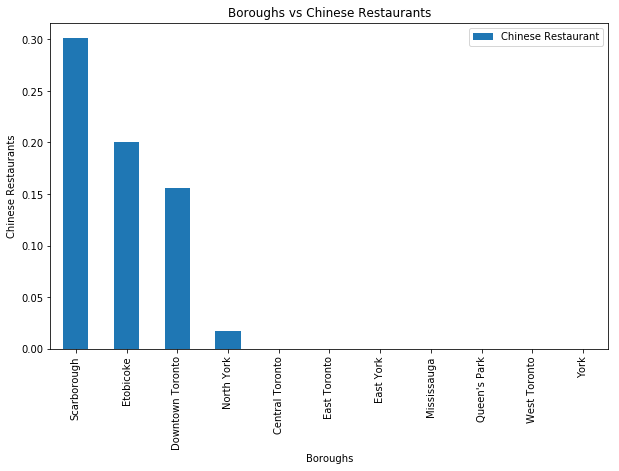

In [32]:
pl = pd.DataFrame(tor_merged.groupby('Borough')['Chinese Restaurant'].sum())
pl = pl.sort_values(by ='Chinese Restaurant', ascending=False)
pl.plot(kind='bar', figsize=(10,6))
plt.xlabel("Boroughs")
plt.ylabel("Chinese Restaurants")
plt.title("Boroughs vs Chinese Restaurants")
plt.show()

Let's now try to visualize similar plot but with neighborhood data.

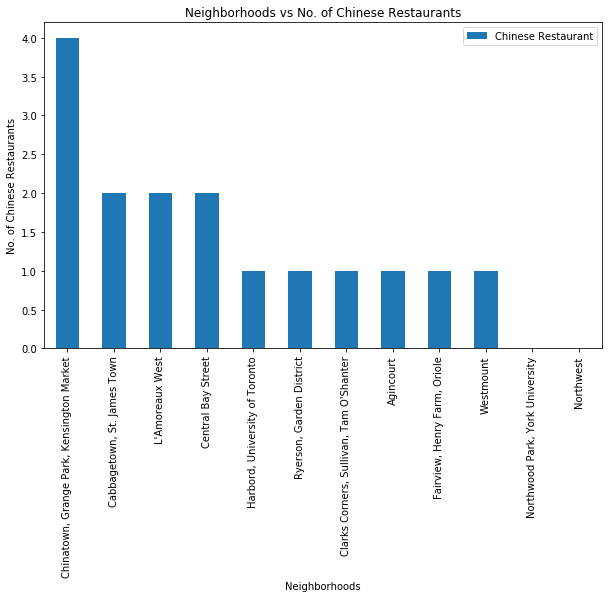

In [33]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Chinese Restaurant'].sum())
graph = graph.sort_values(by ='Chinese Restaurant', ascending=False)
graph.iloc[:12].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Chinese Restaurants")
plt.title("Neighborhoods vs No. of Chinese Restaurants")
plt.show()

### Comapring Neighbourhoods and the Chinese Population

Merge the population by ethnicity data

In [34]:
ET = EY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_pop_df.append(Scarborough_pop_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', '% of Ethnic Origin 1','Ethnic Origin #2', '% of Ethnic Origin 2',
                               'Ethnic Origin #3','% of Ethnic Origin 3','Ethnic Origin #4', '% of Ethnic Origin 4','Ethnic Origin #5','% of Ethnic Origin 5', 
                               'Ethnic Origin #6','% of Ethnic Origin 6','Ethnic Origin #7', '% of Ethnic Origin 7','Ethnic Origin #8', '% of Ethnic Origin 8',
                               'Ethnic Origin #9','% of Ethnic Origin 9',
                              ]]
pop_ethnic_df


,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8,Ethnic Origin #9,% of Ethnic Origin 9
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
7,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
9,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can now filter the areas with Chinese population

In [35]:
#Filtering with Chinese ethnic crowd
filtered = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Chinese')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Chinese')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'Chinese')]
pop_chinese_df = pd.DataFrame(filtered).reset_index()
pop_chinese_df.drop('index',axis=1,inplace=True)

pop_chinese_df

,Riding,Population,Ethnic Origin #1,% of Ethnic Origin 1,Ethnic Origin #2,% of Ethnic Origin 2,Ethnic Origin #3,% of Ethnic Origin 3,Ethnic Origin #4,% of Ethnic Origin 4,Ethnic Origin #5,% of Ethnic Origin 5,Ethnic Origin #6,% of Ethnic Origin 6,Ethnic Origin #7,% of Ethnic Origin 7,Ethnic Origin #8,% of Ethnic Origin 8,Ethnic Origin #9,% of Ethnic Origin 9
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
4,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
8,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
9,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN


In [36]:
columns = pop_chinese_df.columns[2:].to_list()
chinpop_df_with_perc = pd.DataFrame()

for i in range(0, pop_chinese_df.shape[0]):
    for j in columns:
        if pop_chinese_df.at[i,j] == 'Chinese':
            perc = columns.index(j) + 1
            perc_col = columns[perc]
            chinpop_df_with_perc = chinpop_df_with_perc.append({'Riding':pop_chinese_df.at[i, 'Riding'], 'Population':pop_chinese_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_chinese_df.at[i, j], 'Percentage': pop_chinese_df.at[i, perc_col]},ignore_index=True)
            
chinpop_df_with_perc



,Ethnicity,Percentage,Population,Riding
0,Chinese,25.9,117405.0,Willowdale
1,Chinese,32.4,109060.0,Don Valley North
2,Chinese,11.2,101790.0,Don Valley West
3,Chinese,8.9,93170.0,Don Valley East
4,Chinese,25.9,117405.0,Willowdale
5,Chinese,32.4,109060.0,Don Valley North
6,Chinese,11.2,101790.0,Don Valley West
7,Chinese,8.9,93170.0,Don Valley East
8,Chinese,16.0,114315.0,Spadina-Fort York
9,Chinese,13.8,105395.0,Toronto-Danforth


In [37]:
chinpop_df_with_perc = chinpop_df_with_perc.rename(columns={'Population':'Total Population'})
chinpop_df_with_perc.drop_duplicates(keep='first',inplace=True)
chinpop_df_with_perc.reset_index(inplace=True, drop=True)
chinpop_df_with_perc

,Ethnicity,Percentage,Total Population,Riding
0,Chinese,25.9,117405.0,Willowdale
1,Chinese,32.4,109060.0,Don Valley North
2,Chinese,11.2,101790.0,Don Valley West
3,Chinese,8.9,93170.0,Don Valley East
4,Chinese,16.0,114315.0,Spadina-Fort York
5,Chinese,13.8,105395.0,Toronto-Danforth
6,Chinese,14.7,100520.0,University-Rosedale
7,Chinese,12.5,99590.0,Toronto Centre


Now that we have all the Ridings with total population and percent of Chinese population, we can find out the total number of people living in each Riding

In [38]:
chinpop_df_with_perc['Chinese Population'] = (chinpop_df_with_perc['Total Population']/100)*chinpop_df_with_perc['Percentage']
chinpop_df_with_perc

,Ethnicity,Percentage,Total Population,Riding,Chinese Population
0,Chinese,25.9,117405.0,Willowdale,30407.895
1,Chinese,32.4,109060.0,Don Valley North,35335.440
2,Chinese,11.2,101790.0,Don Valley West,11400.480
3,Chinese,8.9,93170.0,Don Valley East,8292.130
4,Chinese,16.0,114315.0,Spadina-Fort York,18290.400
5,Chinese,13.8,105395.0,Toronto-Danforth,14544.510
6,Chinese,14.7,100520.0,University-Rosedale,14776.440
7,Chinese,12.5,99590.0,Toronto Centre,12448.750


Visualizing comparison of Chinese population in the neighbourhoods. This will help us identify the areas which are densely populated with Chinese people. This will also help us identify the places which are already famous for Chinese restaurants and the ones which are not. This can prove to be a very important step to decide where the new restaurant should be placed.

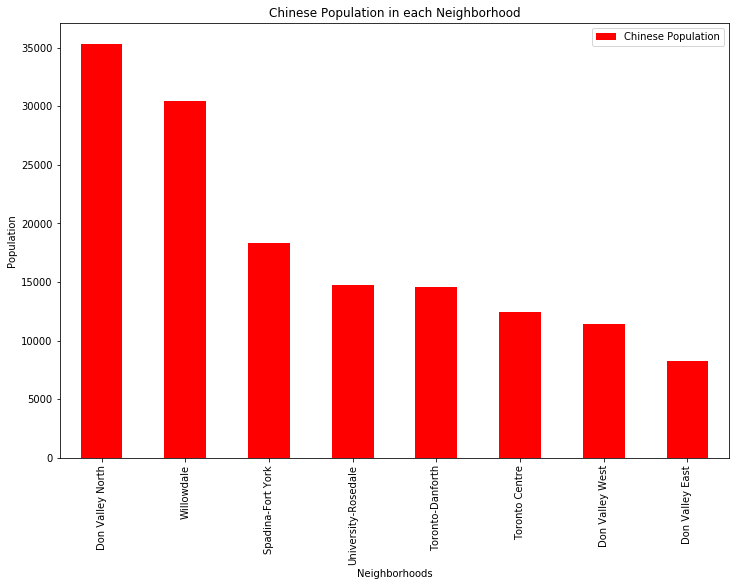

In [37]:
bar_graph = chinpop_df_with_perc.sort_values(by='Percentage', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Chinese Population',figsize=(12,8), color='red')
plt.title("Chinese Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

### Relationship between population and restaurant

We can now find the relationship between these densely populated areas and the areas which are famous for Chinese restaurants.

In [38]:
# Acquire the list of Ridings to fetch the neighborhoods in each riding from Wikioedia
rid_list = chinpop_df_with_perc['Riding'].to_list()

rid_list[rid_list.index('Willowdale')] = 'Willowdale (electoral district)'

rid_list


['Willowdale (electoral district)',
 'Don Valley North',
 'Don Valley West',
 'Don Valley East',
 'Spadina-Fort York',
 'Toronto-Danforth',
 'University-Rosedale',
 'Toronto Centre']

In [39]:
# In order to keep the resulta precise, we will scrap the neighborhood data only for those ridings which have a scrapable wikipedia page and
# have the 'Geography section' in the page

unwanted_num = {'Spadina-Fort York','Toronto-Danforth','Toronto Centre'}
rid_list = [ele for ele in rid_list if ele not in unwanted_num]

import wikipedia
rid_neighborhood_df = pd.DataFrame()

for item in rid_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    rid_neighborhood_df = rid_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    #print(section)


rid_neighborhood_df = rid_neighborhood_df[['Riding','Neighborhoods']]
rid_neighborhood_df

,Riding,Neighborhoods
0,Willowdale (electoral district),"Willowdale, Lansing, Newtonbrook and North Yo..."
1,Don Valley North,"Henry Farm, Bayview Village, Bayview Woods-St..."
2,Don Valley West,"York Mills, Silver Hills, the western half of..."
3,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
4,University-Rosedale,"Rosedale, Little Italy, the Annex and Yorkvil..."


In [40]:
n_pop = pd.merge(chinpop_df_with_perc, rid_neighborhood_df, on='Riding')

n_pop.drop(columns=['Riding'],inplace =True)
n_pop

,Ethnicity,Percentage,Total Population,Chinese Population,Neighborhoods
0,Chinese,32.4,109060.0,35335.44,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,Chinese,11.2,101790.0,11400.48,"York Mills, Silver Hills, the western half of..."
2,Chinese,8.9,93170.0,8292.13,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,Chinese,14.7,100520.0,14776.44,"Rosedale, Little Italy, the Annex and Yorkvil..."


In [41]:
n_pop['split_neighborhoods'] = n_pop['Neighborhoods'].str.split(',') 
n_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
n_pop = n_pop.split_neighborhoods.apply(pd.Series).merge(n_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

n_pop.reset_index()
n_pop

,Chinese Population,Neighborhood
0,35335.44,Henry Farm
1,11400.48,York Mills
2,8292.13,Flemingdon Park
3,14776.44,Rosedale
4,35335.44,Bayview Village
5,11400.48,Silver Hills
6,8292.13,Don Mills
7,14776.44,Little Italy
8,35335.44,Bayview Woods-Steeles
9,11400.48,the western half of Don Mills


In [42]:
n_pop = n_pop[:21]
n_pop

,Chinese Population,Neighborhood
0,35335.44,Henry Farm
1,11400.48,York Mills
2,8292.13,Flemingdon Park
3,14776.44,Rosedale
4,35335.44,Bayview Village
5,11400.48,Silver Hills
6,8292.13,Don Mills
7,14776.44,Little Italy
8,35335.44,Bayview Woods-Steeles
9,11400.48,the western half of Don Mills


In [43]:
toronto_chi['split_neighborhoods'] = toronto_chi['Neighbourhood'].str.split(',') 
toronto_chi.drop(columns=['Neighbourhood'],inplace=True,axis=1)
toronto_chi = toronto_chi.split_neighborhoods.apply(pd.Series).merge(toronto_chi, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Chinese Restaurant'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

toronto_chi.reset_index()
toronto_chi

,Chinese Restaurant,Neighbourhood
0,0.000000,Adelaide
1,0.133333,Agincourt
2,0.000000,Agincourt North
3,0.000000,Albion Gardens
4,0.000000,Alderwood
5,0.000000,Bayview Village
6,0.000000,Bedford Park
7,0.000000,Berczy Park
8,0.000000,Birch Cliff
9,0.000000,Bloordale Gardens


In [44]:
toronto_chi = toronto_chi.rename(columns = {'Neighbourhood':'Neighborhood'})
pop_merged_restaurant_percent = pd.merge(n_pop, toronto_chi, on='Neighborhood')
pop_merged_restaurant_percent

,Chinese Population,Neighborhood,Chinese Restaurant
0,35335.44,Henry Farm,0.0
1,11400.48,York Mills,0.0


As we can see, after cleaning and analyzing the data for relationship between population and restaurants, we do not find any significant results. Most of the matched records have null values which means there is not any significant relationship between these two varibles.

This was the last step in the analysis part of this project. Now, we will be using predictive moedelling technique- Clustering. We will be using K-Means clustering as the data is not labelled. This technique will organize the data into seperate clusters depending on the similarities.

# PART 4

### PREDICTIVE MODELLING- KMeans Clustering

The first step of clustering is to determine the best K value, which means best value for the number of clusters to use.
To achieve this, we will make use of the elbow method on our dataset.

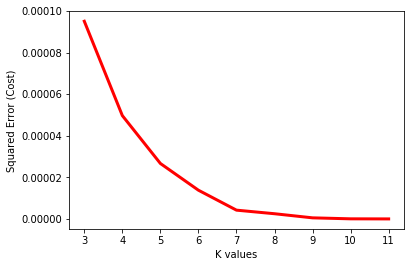

In [45]:

toronto_chi_cluster = toronto_chi.drop('Neighborhood', 1)

error_cost = []

for i in range(3,12):
    km = KMeans(n_clusters = i, max_iter=100)
    try:
        km.fit(toronto_chi_cluster)
    except ValueError:
        print('error occurred on line ',i)
    
    #calculate squared error for the clustered points
    error_cost.append(km.inertia_/100)
    
#plot the K values aganist the squared error cost
plt.plot(range(3,12), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [46]:
#!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)


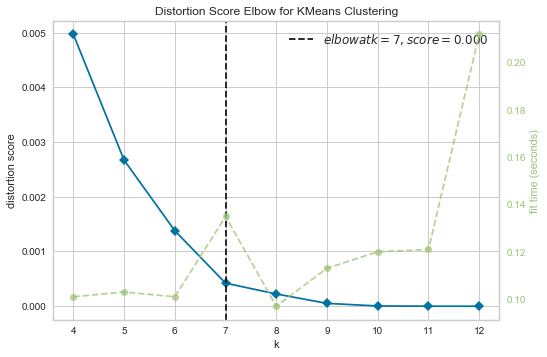

In [47]:
model = KMeans()
vis = KElbowVisualizer(model, k=(4,13))

vis.fit(toronto_chi_cluster)
vis.show()


### The above plot shows the elbow method using distortion score and squared error for each K value between 4 and 12 which concludes that optimal number of clusters(k) is 7. 
### We will use k=7 in our clustering technique.

In [48]:
k_cluster = 7

kmeans = KMeans(n_clusters = k_cluster, random_state=0).fit(toronto_chi_cluster)

kmeans.labels_

array([0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 6, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1])

In [50]:
toronto_chi.insert(0, 'Cluster', kmeans.labels_)

toronto_final = df_backup
toronto_final = toronto_final.rename(columns = {'Neighbourhood':'Neighborhood'})
toronto_final = toronto_final.join(toronto_chi.set_index('Neighborhood'), on='Neighborhood')
toronto_final.dropna(subset=["Cluster"], axis=0, inplace=True)
toronto_final.reset_index(drop=True, inplace=True)
toronto_final['Cluster'].astype(int)
toronto_final.head()

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant
0,M3A,North York,Parkwoods,0.0,0.0
1,M4A,North York,Victoria Village,0.0,0.0
2,M5A,Downtown Toronto,Harbourfront,0.0,0.0
3,M6A,North York,Lawrence Heights,0.0,0.0
4,M7A,Downtown Toronto,Queen's Park,0.0,0.0


In [51]:
toronto_final = pd.merge(toronto_final, latlng_df, on='Postcode')
toronto_final

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
0,M3A,North York,Parkwoods,0.0,0.000000,43.752420,-79.329242
1,M4A,North York,Victoria Village,0.0,0.000000,43.730600,-79.313265
2,M5A,Downtown Toronto,Harbourfront,0.0,0.000000,43.650295,-79.359166
3,M6A,North York,Lawrence Heights,0.0,0.000000,43.723270,-79.451286
4,M7A,Downtown Toronto,Queen's Park,0.0,0.000000,43.661150,-79.391715
5,M9A,Queen's Park,Queen's Park,0.0,0.000000,43.662299,-79.528195
6,M1B,Scarborough,Rouge,0.0,0.000000,43.811525,-79.195517
7,M3B,North York,Don Mills North,0.0,0.000000,43.749055,-79.362227
8,M4B,East York,Woodbine Gardens,0.0,0.000000,43.707535,-79.311773
9,M5B,Downtown Toronto,Ryerson,0.0,0.010000,43.657363,-79.378180


Visualizing clusters on a map

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='90%')

# set color scheme for the clusters
x = np.arange(k_cluster)
ys = [i + x + (i*x)**2 for i in range(k_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Examining the clusters

##### Let's examine the clusters one by one which will help us to identify the areas where the business can thrive

#### CLUSTER 0

The Cluster 0 contains the neighborhoods with least number of Chinese Restaurants. It can be seen marked in Red color on the map

In [53]:
toronto_final.loc[toronto_final['Cluster'] == 0]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
0,M3A,North York,Parkwoods,0.0,0.00,43.752420,-79.329242
1,M4A,North York,Victoria Village,0.0,0.00,43.730600,-79.313265
2,M5A,Downtown Toronto,Harbourfront,0.0,0.00,43.650295,-79.359166
3,M6A,North York,Lawrence Heights,0.0,0.00,43.723270,-79.451286
4,M7A,Downtown Toronto,Queen's Park,0.0,0.00,43.661150,-79.391715
5,M9A,Queen's Park,Queen's Park,0.0,0.00,43.662299,-79.528195
6,M1B,Scarborough,Rouge,0.0,0.00,43.811525,-79.195517
7,M3B,North York,Don Mills North,0.0,0.00,43.749055,-79.362227
8,M4B,East York,Woodbine Gardens,0.0,0.00,43.707535,-79.311773
9,M5B,Downtown Toronto,Ryerson,0.0,0.01,43.657363,-79.378180


### Cluster 1

The Cluster 1 contains the neighborhoods which are significantly populated with Chinese Restaurants. It can be identified with Purple colored marks on the map.

In [55]:
toronto_final.loc[toronto_final['Cluster'] == 1]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
69,M9P,Etobicoke,Westmount,1.0,0.2,43.696505,-79.530252
100,M8Y,Etobicoke,Humber Bay,1.0,0.2,43.632835,-79.489550


### Cluster 2

The Cluster 2 contains the neighborhoods which are moderately populated with Chinese Restaurants. It can be identified by the blue color marks on the map.

In [57]:
toronto_final.loc[toronto_final['Cluster'] == 2]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
23,M5G,Downtown Toronto,Central Bay Street,2.0,0.021053,43.656091,-79.384930
79,M5S,Downtown Toronto,Harbord,2.0,0.018519,43.663110,-79.401801
94,M4X,Downtown Toronto,Cabbagetown,2.0,0.025641,43.668160,-79.366602


### Cluster 3

The Cluster 3 contains the neighborhoods which are a little more moderately populated with Chinese Restaurants. It is shown by light blue color on the map.

In [58]:
toronto_final.loc[toronto_final['Cluster'] == 3]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
81,M1T,Scarborough,Clarks Corners,3.0,0.083333,43.784725,-79.299066


### Cluster 4

The Cluster 4 contains the neighborhoods which are a little densely populated with Chinese Restaurants. It can be identified with sea green colored marks on the map.

In [60]:
toronto_final.loc[toronto_final['Cluster'] == 4]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
77,M1S,Scarborough,Agincourt,4.0,0.133333,43.79394,-79.267976


### Cluster 5

The Cluster 5 contains the neighborhoods which are densely populated with Chinese Restaurants. This can be seen with yellow markers on the map.

In [62]:
toronto_final.loc[toronto_final['Cluster'] == 5]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
36,M1K,Scarborough,East Birchmount Park,5.0,0.166667,43.726276,-79.263625
89,M1W,Scarborough,L'Amoreaux West,5.0,0.181818,43.800883,-79.320740


### Cluster 6

The Cluster 6 contains the neighborhoods which are moderately populated with Chinese Restaurants. It can be identified with the orange marker on the map.

In [63]:
toronto_final.loc[toronto_final['Cluster'] == 6]

,Postcode,Borough,Neighborhood,Cluster,Chinese Restaurant,Latitude,Longitude
83,M5T,Downtown Toronto,Chinatown,6.0,0.054054,43.65353,-79.397233


## RESULTS, DISCUSSION AND CONCLUSION

### RESULTS:

#### -The neighborhoods in Etobicoke, Scarborough, Downtown Toronto and North York have the greatest number of Chinese Restaurants. As far as the Chinese population density Is concerned, we have discovered that Willowdale, Don Valley-North, West and East, Spadina-Fort York, Toronto-Dan Forth,  University-Rosedale  and  Toronto Centre  hold  the  highest  Chinese population densities. 
#### - After clustering, considering Etobicoke and Downtown Toronto, these areas are mostly populated with Chinese restaurants and there would be a lot of competition around these areas. 
#### - Scarborough and North York have a significantly high number of Chinese populated areas. The neighborhoods based in these areas should be ideal in order to start a new Chinese Restaurant business. Considering Scarborough already has some Chinese Restaurants, the best option would be to choose the areas based under North York as it holds least competition and high population.

### CONCLUSION: 

#### To conclude, we can say that we have successfully fetched, cleaned, visualized the data and created a model to solve a business problem and hopefully, this analysis could help providing a head-start insolving any similar real-world business problem. 